# Nibabel Library

https://nipy.org/nibabel/

```conda install -c conda-forge nibabel```

In [1]:
from numpy import concatenate, zeros, linspace

from matplotlib.pyplot import subplots

from matplotlib.image import imread


## Load images and get data

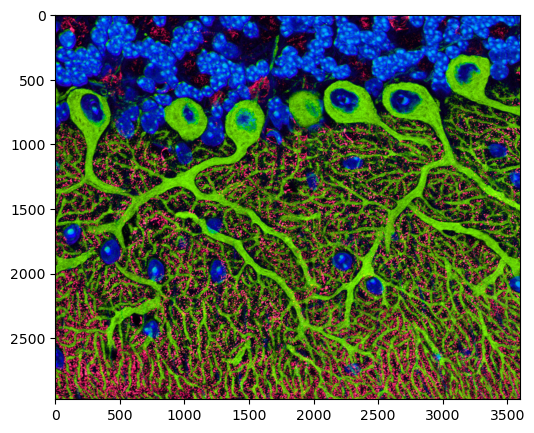

In [2]:
img = imread('rat_cerebellum.jpg')

fig, ax = subplots(figsize=(6, 5))

ax.imshow(img, cmap='gray');


In [82]:
downsample = 3

img_r = img[::downsample, ::downsample, 0].reshape(-1, 1)
img_g = img[::downsample, ::downsample, 1].reshape(-1, 1)
img_b = img[::downsample, ::downsample, 2].reshape(-1, 1)

img_reshaped = concatenate((img_r, img_g, img_b), axis = 1)

img_reshaped.shape

(1191392, 3)

## Visualise and Concatenate

Seaborn: https://seaborn.pydata.org

c.f. pair grid example
https://seaborn.pydata.org/examples/pair_grid_with_kde.html

kdeplot documentation
https://seaborn.pydata.org/generated/seaborn.kdeplot.html




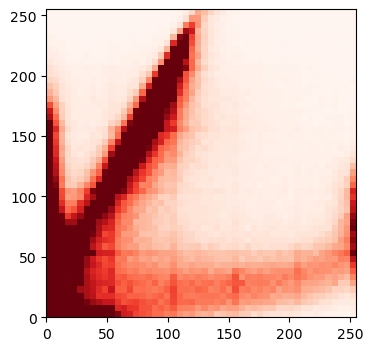

In [76]:
fig, ax = subplots(figsize=(4, 4))

# 2D Histogram
ax.hist2d(img_reshaped[:, 0], img_reshaped[:, 1], bins=50, vmax=1000, cmap='Reds');


# GMM clustering


In [77]:
from sklearn.mixture import GaussianMixture

In [78]:
n_components = 4

SEED = 12345

gmm = GaussianMixture(n_components=n_components, random_state=SEED)

all_img_labels = gmm.fit_predict(img_reshaped)

all_img_labels[0]


2

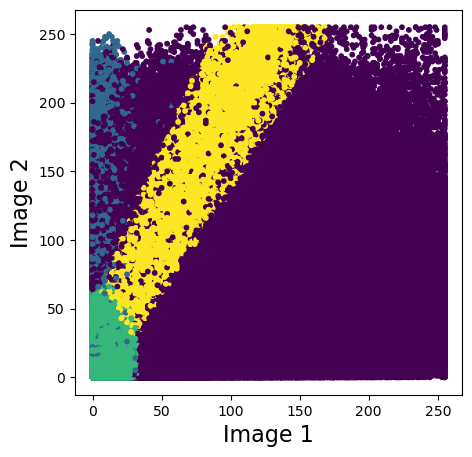

In [79]:
fig, ax = subplots(figsize=(5, 5))

ax.scatter(img_reshaped[:, 0], img_reshaped[:, 1], c=all_img_labels, s=10)

ax.set_xlabel('Image 1', fontsize=16)
ax.set_ylabel('Image 2', fontsize=16);


In [83]:
all_img_labels_mapped = zeros(img[::downsample, ::downsample, 0].shape)

mask = all_img_labels_mapped>-1

all_img_labels_mapped[mask] = all_img_labels


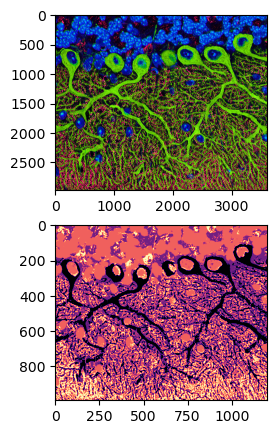

In [84]:
fig, ax = subplots(nrows=2, figsize=(5, 5))

ax[0].imshow(img, cmap='gray');
ax[1].imshow(all_img_labels_mapped, cmap='magma_r');
